# Mnist image classification :

In [63]:
### importing required libraries :
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [64]:
### importing mnist dataset :
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [65]:
### printing shapes of the train and test datasets :
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('=' * 30)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [66]:
### Normalising the data :
X_train = X_train / 255
X_test = X_test / 255
#X_train[0]

In [67]:
### Creating neural network :
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28 * 28,)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')   
])

model.compile(optimizer = 'adam', 
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2814 - accuracy: 0.9209
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1268 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0890 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0679 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0539 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0428 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0370 - accuracy: 0.9884
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0287 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0251 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [68]:
### Flattening X_test :
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)
X_test_flattened.shape

(10000, 784)

In [69]:
### model evaluation :
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0788 - accuracy: 0.9782


[0.07882080972194672, 0.9782000184059143]

In [70]:
### Predictions :
y_pred = model.predict(X_test_flattened)
y_pred

array([[3.78475465e-06, 7.05722414e-06, 2.06950933e-01, ...,
        9.99983191e-01, 1.29076242e-02, 1.27554923e-01],
       [1.87516212e-04, 4.00360078e-01, 1.00000000e+00, ...,
        1.36615835e-14, 1.52894258e-02, 4.39974945e-09],
       [5.03021192e-06, 9.99405980e-01, 1.21347934e-01, ...,
        8.27640295e-02, 3.56632590e-01, 6.14106655e-04],
       ...,
       [5.80769634e-11, 2.71016524e-05, 1.70418435e-08, ...,
        1.12379223e-01, 9.19100642e-03, 6.92427337e-01],
       [1.10795409e-04, 4.00841174e-08, 4.99163548e-07, ...,
        7.21555843e-05, 9.90881562e-01, 3.84120976e-05],
       [2.98172235e-04, 8.19745692e-05, 4.00254130e-03, ...,
        1.17666112e-07, 7.98323163e-05, 2.00594785e-09]], dtype=float32)

In [71]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [72]:
y_pred = [np.argmax(prediction) for prediction in y_pred]
y_pred[:5]

[7, 2, 1, 0, 4]

In [73]:
### Confusion matrix :
cm = tf.math.confusion_matrix(y_pred, y_test)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    0,    1,    2,    3,    1,    4,    2],
       [   1, 1126,    1,    0,    0,    0,    4,    5,    0,    4],
       [   2,    6, 1012,    4,    1,    0,    2,    9,    6,    0],
       [   1,    0,    3,  989,    0,   12,    1,    3,    6,    5],
       [   2,    0,    4,    1,  964,    1,    4,    2,    3,   10],
       [   0,    1,    0,    3,    1,  863,    3,    0,    3,    5],
       [   0,    1,    2,    0,    4,    5,  939,    0,    2,    0],
       [   1,    0,    5,    4,    1,    1,    0, 1000,    4,    2],
       [   2,    1,    4,    0,    1,    5,    2,    2,  943,    4],
       [   2,    0,    0,    9,    9,    3,    0,    6,    3,  977]])>

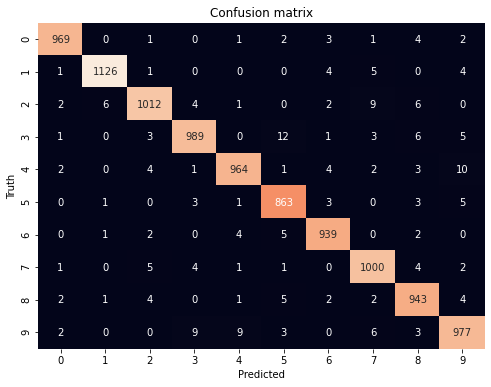

In [74]:
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

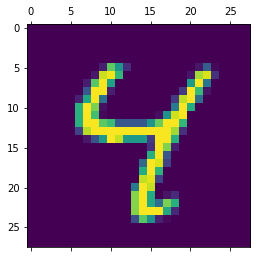

In [75]:
plt.matshow(X_test[6])

In [77]:
y_pred[6]

4